<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022/blob/main/Projects/15_1_Encoding_and_Dummy_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**


In this section, we are importing all the required libraries such as pandas, NumPy, matplotlib, plotly, seaborn, and word cloud and many more that are required for extracting and analysing the data for this worksheet.

In [36]:
#IMPORT LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

# **Preparing dataset for encoding**



When we encode data, we remodel a numeric column in a dataframe to be on a standard scale (0 or 1).

For example if we had a column of BMI scores, we could encode that column so that all scores greater than or equal to 25 were recoded to the value 1 (bad) and all scores less than 25 were recoded to 0 (good).



1. Read Covid vaccination data from the `by_country` sheet in the Excel file at this link : https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true

2. Find out which columns have missing values

3. Remove all rows with missing data in the total_vaccination column  

4. Remove all rows with missing data in the daily_vaccinations_per_million 

4. find the median daily_vaccinations_per_million, storing this in a variable for use later     



**Importing and inspecting data**


Using pd.read_excel() founction to read the dataset into a pandas dataframe that will be named 'vaccination_df'. I will write a function called 'get_summary' that will:


    - use vaccination_df.head() to display the first 5 rows of the dataset

    - use vaccination_df.info() to display a technical summary of the data

    - use vaccination_df.describe() to display a numerical summary of the data


In [14]:
# the code below reads the data table from a sheet in an Excel file
url = "https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true"

# Task 1 dataframe is saved in a variable named covid_df
covid_df = pd.read_excel(url,sheet_name="by_country") 
covid_df #print the data 

def get_summary(covid_df):

  # the code below which prints the first 5 rows of the dataset, the info and the numerical summary
  return covid_df.head(), covid_df.info(), covid_df.describe()

get_summary(covid_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

(       country iso_code       date  total_vaccinations  people_vaccinated  \
 0  Afghanistan      AFG 2021-02-22                 0.0                0.0   
 1  Afghanistan      AFG 2021-02-23                 NaN                NaN   
 2  Afghanistan      AFG 2021-02-24                 NaN                NaN   
 3  Afghanistan      AFG 2021-02-25                 NaN                NaN   
 4  Afghanistan      AFG 2021-02-26                 NaN                NaN   
 
    people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
 0                      NaN                     NaN                 NaN   
 1                      NaN                     NaN              1367.0   
 2                      NaN                     NaN              1367.0   
 3                      NaN                     NaN              1367.0   
 4                      NaN                     NaN              1367.0   
 
    total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
 0       

OBSERVATION:

In [15]:
## Task 2 ## to find out which columns have missing values- use pandas “isnull()” function to find out all the fields which have missing values. 

covid_df.info()

# Note: info() function is used to get the overview of data like data type of feature, a number of null values in each column, and many more.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

In [16]:
# The below function is used to get the total count of null values in each feature
covid_df.isnull().sum()

#Observation # : The below picture shows tables like country, iso_code, date, vavvines, sources_name and source_website has 0 null values. Feture like  "people_fully_vaccinated" and "people_fully_vaccinated_per hundred" have a maximun of 8836 null values.

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5983
people_vaccinated                      6624
people_fully_vaccinated                8836
daily_vaccinations_raw                 7419
daily_vaccinations                      198
total_vaccinations_per_hundred         5983
people_vaccinated_per_hundred          6624
people_fully_vaccinated_per_hundred    8836
daily_vaccinations_per_million          198
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

**Data cleansing**

In [17]:
# Task 3 -Remove all rows with missing data in the "total_vaccination" column
drop_df = covid_df.dropna(subset = ["total_vaccinations"])
drop_df
drop_df.shape

(9011, 15)

In [18]:
# Task 4 -Remove all rows with missing data in the "daily_vaccinations_per_million" column
new_df = drop_df.dropna(subset = ["daily_vaccinations_per_million"])
new_df
new_df.shape

(8816, 15)

In [19]:
## Method 1: find the median daily_vaccinations_per_million
median = new_df["daily_vaccinations_per_million"].median()
print(median)

1915.5


In [20]:
## Method 2: find the median daily_vaccinations_per_million
import numpy as np

np.median(new_df["daily_vaccinations_per_million"])


1915.5

# **Encode daily vaccinations**


Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0 

In [24]:
# Task - Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0
def encode_daily(df, median):

  if df["daily_vaccinations_per_million"] >= median:
    return 1 
  else: 
    return 0

#To creat a new cloumn "encoded" 
new_df["encoded"] = new_df.apply(encode_daily, axis = 1, median = median)
new_df
new_df["encoded"].describe()


count    8816.000000
mean        0.500000
std         0.500028
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: encoded, dtype: float64

# **Encoding total vaccinations**





The United Kingdom has been praised for its fast vaccine rollout. 
1. Find the minimum total vaccinations for the United Kingdom 
2. Write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
3. Display the unique countries for which total vaccinated is at the same rate or more than the UK





In [25]:
# Task 1 -Find the minimum total vaccinations for the United Kingdom
min_uk = drop_df[drop_df["country"] == "United Kingdom"] ["total_vaccinations"].min()
print(min_uk)

1402432.0


In [26]:
# Task 2 - encode total_vaccinations
def encode_daily(df, min_uk):
  
  if df["total_vaccinations"] >= min_uk:
    return 1 
  else: 
    return 0
   
#To creat a new cloumn "encoded" 
drop_df["encoded"] = covid_df.apply(encode_daily, axis = 1, min_uk = min_uk)
drop_df["encoded"].describe()  
#drop_df.describe()                          

count    9011.00000
mean        0.29808
std         0.45744
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: encoded, dtype: float64

In [27]:
# Task 3 -Display the unique countries for which total vaccinated is at the same rate or more than the UK
df_filtered = drop_df[drop_df["encoded"]==1]
df_filtered.country.unique()

array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Wales'], dtype=object)

# **Creat each new series of total vaccinations for each manufacturer**
  
1. read data from 'by_manufacturer' sheet from Covid data 
2. find the sum of total vaccinations for each manufacturer
3. create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
4. find the median percentage 
5. create a new column called 'encoded_percentages' which duplicates the percentages column
6. encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 



In [28]:
 # Task 4.1 - read data from 'by_manufacturer' sheet from Covid data
url = "https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true"
df = pd.read_excel(url,sheet_name="by_manufacturer")
df
#df.info()

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649
...,...,...,...,...
3291,United States,2021-05-01,Moderna,105947940
3292,United States,2021-05-01,Pfizer/BioNTech,129013657
3293,United States,2021-05-02,Johnson&Johnson,8374395
3294,United States,2021-05-02,Moderna,106780082


In [29]:
# task 4.2 - find the sum of total vaccinations for each manufacturer
sum_by_manufacturer = df.groupby("vaccine")["total_vaccinations"].sum()
sum_by_manufacturer

vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64

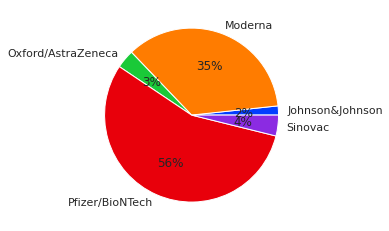

In [30]:
# plot a pie chart to show the sum of total vaccinations for each manufacturer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = df.groupby("vaccine")["total_vaccinations"].sum()
data = data
labels = data.keys()
#labels 
colors = colors = sns.color_palette("bright")
plt.pie(data, labels = labels, autopct='%1.0f%%', colors = colors)       
plt.show()

In [31]:
# task 4.3 - create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations#
  # to duplicate an existing column
    # df['new_column'] = df['old_column']
  # to add two columns together
    # df['new_column'] = df['column1'] + df['column2']
  # to make a percentages column
    # df['new_column'] = (df['column1']/df['column1].sum()) * 100 

df["total"] = df["total_vaccinations"].sum()
df["percentages"] = (df["total_vaccinations"]/df["total"]) * 100
df

,location,date,vaccine,total_vaccinations,total,percentages
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,0.000003
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,0.000033
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,0.000053
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,0.000055
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,0.000055
...,...,...,...,...,...,...
3291,United States,2021-05-01,Moderna,105947940,15647431011,0.677095
3292,United States,2021-05-01,Pfizer/BioNTech,129013657,15647431011,0.824504
3293,United States,2021-05-02,Johnson&Johnson,8374395,15647431011,0.053519
3294,United States,2021-05-02,Moderna,106780082,15647431011,0.682413


In [32]:
# task 4.4 - find the median percentage
median_percentage = df["percentages"].median()
print(median_percentage)

0.0011110194374896931


In [33]:
# task 4.5 - create a new column called 'encoded_percentages' which duplicates the percentages column
  # to duplicate an existing column
   # df['new_column'] = df['old_column']

df["encoded_percentages"] = df["percentages"]
df


,location,date,vaccine,total_vaccinations,total,percentages,encoded_percentages
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,0.000003,0.000003
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,0.000033,0.000033
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,0.000053,0.000053
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,0.000055,0.000055
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,0.000055,0.000055
...,...,...,...,...,...,...,...
3291,United States,2021-05-01,Moderna,105947940,15647431011,0.677095,0.677095
3292,United States,2021-05-01,Pfizer/BioNTech,129013657,15647431011,0.824504,0.824504
3293,United States,2021-05-02,Johnson&Johnson,8374395,15647431011,0.053519,0.053519
3294,United States,2021-05-02,Moderna,106780082,15647431011,0.682413,0.682413


In [34]:
# task 4.6 - encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 

def encode_daily(df, median_percentage):
  

  if df["percentages"] >= median_percentage:
    return 1 
  else: 
    return 0

df["encoded_percentages"] = df.apply(encode_daily, axis = 1, median_percentage = median_percentage )
df

,location,date,vaccine,total_vaccinations,total,percentages,encoded_percentages
0,Chile,2020-12-24,Pfizer/BioNTech,420,15647431011,0.000003,0
1,Chile,2020-12-25,Pfizer/BioNTech,5198,15647431011,0.000033,0
2,Chile,2020-12-26,Pfizer/BioNTech,8338,15647431011,0.000053,0
3,Chile,2020-12-27,Pfizer/BioNTech,8649,15647431011,0.000055,0
4,Chile,2020-12-28,Pfizer/BioNTech,8649,15647431011,0.000055,0
...,...,...,...,...,...,...,...
3291,United States,2021-05-01,Moderna,105947940,15647431011,0.677095,1
3292,United States,2021-05-01,Pfizer/BioNTech,129013657,15647431011,0.824504,1
3293,United States,2021-05-02,Johnson&Johnson,8374395,15647431011,0.053519,1
3294,United States,2021-05-02,Moderna,106780082,15647431011,0.682413,1



# **More Features**

In [35]:
print('Data point starts from ',covid_df.date.min())
print('Data point ends at ',covid_df.date.max())
print('Total no of countries in the data set ',len(covid_df.country.unique()))
print('Total no of unique vaccines in the data set ',len(covid_df.vaccines.unique()))

Data point starts from  2020-12-14 00:00:00
Data point ends at  2021-05-02 00:00:00
Total no of countries in the data set  195
Total no of unique vaccines in the data set  34


**Observation**

Data points start from 2020-12-14

Data points end at 2021-05-02

Total Number of countries in the data set = 195

Total Number of Unique Vaccines in the data set = 34

# **Data Visualisation**



In this section, I am going to chanllage myself to learn some visuals to get insight from dataset. 







In [37]:
## describe() function in pandas used to get the statistics of each feature present in our dataset. Some of the information we get include count, max, min, standard deviation, median, etc.
covid_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.011000e+03,8.370000e+03,6.158000e+03,7.575000e+03,1.479600e+04,9011.000000,8370.000000,6158.00000,14796.000000
mean,4.964584e+06,3.164030e+06,1.580482e+06,1.347569e+05,7.769163e+04,15.456079,11.228710,5.66235,2972.163625
std,2.033452e+07,1.180919e+07,6.840161e+06,5.211912e+05,3.519679e+05,23.238675,15.269686,10.06184,4720.846894
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,6.000000e+04,5.154925e+04,2.350025e+04,2.888500e+03,8.967500e+02,1.330000,1.222500,0.63000,347.000000
50%,4.209400e+05,3.255035e+05,1.729175e+05,1.558300e+04,6.178500e+03,6.300000,4.825000,2.35000,1475.000000
75%,1.932222e+06,1.338161e+06,6.887102e+05,6.249850e+04,2.835000e+04,19.570000,14.667500,6.30000,3908.250000
max,2.753380e+08,1.470470e+08,1.047747e+08,1.160100e+07,7.205286e+06,211.080000,111.320000,99.76000,118759.000000


In [38]:
# unique() function in pandas helps to get unique values present in the feature.
covid_df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'G

# **World Art of Countries**


Word Cloud is a unique way to get information from our dataset. The words are shown in the form of art where the size proportional depends on how much the particular word repeated in the dataset. This is made by using the WordCloud library. Check the below code on how to draw word cloud.





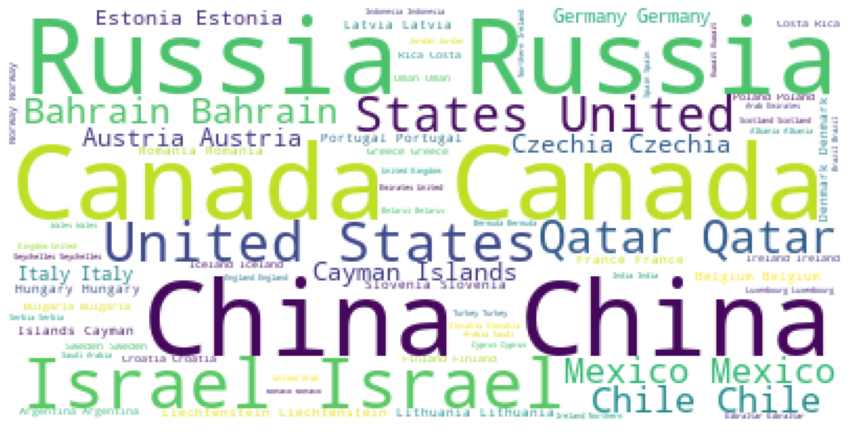

In [39]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 60).generate(' '.join(covid_df.country))
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

# **Most Used Vaccine**

Let’s see what all vaccines are used in the different part of the world:


In [40]:
covid_df.vaccines.unique()

array(['Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Sputnik V', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'Sinopharm/Beijing', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Sinopharm/Beijing, Sputnik V', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca', 'Oxf

# **Word art of Most Used Vaccines:**

Word Cloud is a unique way to get information from our dataset. The words are shown in the form of art where the size proportional depends on how much the particular word repeated in the dataset. This is made by using the WordCloud library.

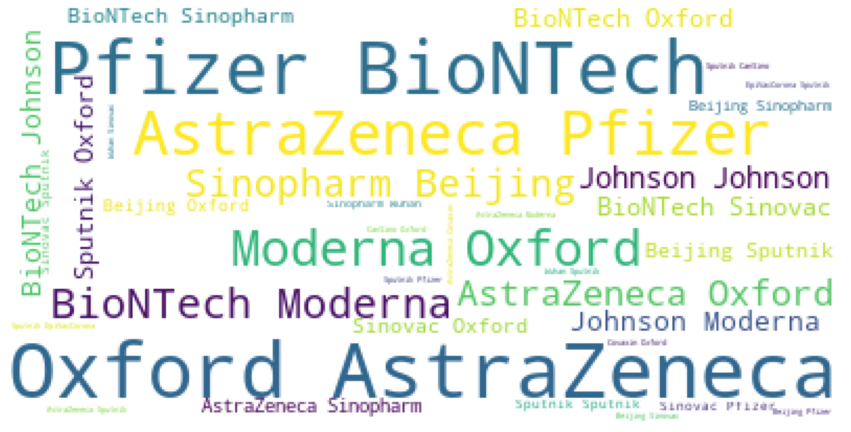

In [41]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 60).generate(' '.join(covid_df.vaccines))
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

I was really enjoying working through this dataset, by doing so I have demonstrated skills as shown follow: 


*   Reviewed data retrieval skills

*   Reviewed data cleaning skills e,g investigating the data and basic information, observation of data and results, drop missing values

*   learnt how to encode and dummy coding 

*   Plotted a pie chart 

*   Challenged by plotting Word arts of unquiue value maily country and vaccine 







## What caused you the most difficulty?

Your answer:

The encoding and dummy coding part was a bit challenge for me however, we worked as team by disscussing and expianing to each other to overcome the issues. 

Will added this as a to do list and will

1. Fully cleaning the data 
2. Data anlsysis between varibles 